In [86]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [87]:
class Model(nn.Module):

    def __init__(self, in_features=4, h1=8, h2=9, out_features=3) -> None:
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

        

In [88]:
torch.manual_seed(41)
model = Model()

In [89]:
import matplotlib.pyplot as pl
import pandas as pd
%matplotlib inline

In [90]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)


In [91]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [92]:
df['variety'] = df['variety'].replace('Setosa', 0.0)
df['variety'] = df['variety'].replace('Versicolor', 1.0)
df['variety'] = df['variety'].replace('Virginica', 2.0)




/var/folders/sy/2jzm18gs78s48trcqgthb1xh0000gn/T/ipykernel_18360/886181633.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['variety'] = df['variety'].replace('Virginica', 2.0)


In [93]:
features = df.drop('variety', axis=1)
output = df['variety']


In [94]:
features = features.values
output = output.values

In [95]:
from sklearn.model_selection import train_test_split


In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(features, output, test_size=0.2, random_state=41)


In [97]:
X_train = torch.FloatTensor(X_train)

X_test = torch.FloatTensor(X_test)

Y_train = torch.LongTensor(Y_train)

Y_test = torch.LongTensor(Y_test)



In [98]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [99]:
import numpy
epochs = 100
losses = []

for i in range(epochs) :
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, Y_train)
    losses.append(loss.detach().numpy())
    if i%10 == 0 :
        print(f'epoch {i} loss = {loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()





epoch 0 loss = 1.125203251838684
epoch 10 loss = 1.0097211599349976
epoch 20 loss = 0.8162347078323364
epoch 30 loss = 0.585993230342865
epoch 40 loss = 0.4003389775753021
epoch 50 loss = 0.26794716715812683
epoch 60 loss = 0.1796349734067917
epoch 70 loss = 0.12165624648332596
epoch 80 loss = 0.0860651433467865
epoch 90 loss = 0.06522615253925323


Text(0, 0.5, 'Epoch')

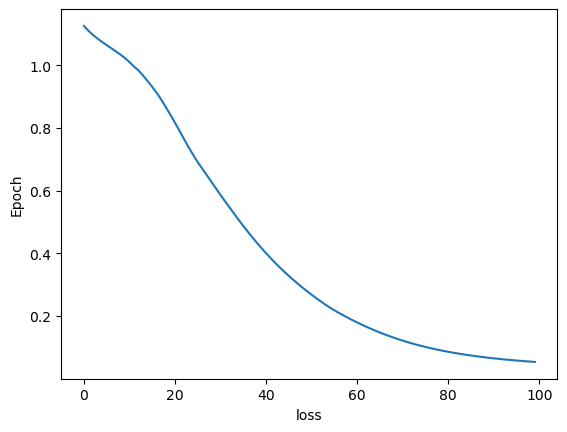

In [100]:
pl.plot(range(epochs), losses)
pl.xlabel('loss')
pl.ylabel('Epoch')

In [104]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, Y_test)

In [109]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test): 
        y_val = model.forward(data)

        print(f'{i+1}.) {str(y_val)} \t {Y_test[i]},{y_val.argmax().item()}')

        if(y_val.argmax().item() == Y_test[i]):
            correct+=1
print(f'{correct}')
    

1.) tensor([-5.8771,  4.4629,  6.5155]) 	 2,2
2.) tensor([-7.5451,  4.1668,  9.7293]) 	 2,2
3.) tensor([-8.4517,  5.1275, 10.2015]) 	 2,2
4.) tensor([-4.3411,  5.6280,  2.5636]) 	 1,1
5.) tensor([-7.1838,  4.8757,  8.3023]) 	 2,2
6.) tensor([-3.3940,  5.3421,  1.2802]) 	 1,1
7.) tensor([-5.9240,  4.9826,  6.0025]) 	 2,2
8.) tensor([-4.2895,  5.7016,  2.3920]) 	 1,1
9.) tensor([-6.5369,  4.9261,  7.1291]) 	 2,2
10.) tensor([-8.0526,  4.4129, 10.3325]) 	 2,2
11.) tensor([-5.6774,  4.9505,  5.6248]) 	 2,2
12.) tensor([ 4.5748, -2.2579, -2.8925]) 	 0,0
13.) tensor([ 4.2646, -2.0055, -2.7342]) 	 0,0
14.) tensor([-2.1081,  4.0482,  0.5803]) 	 1,1
15.) tensor([ 3.4608, -1.2147, -2.3488]) 	 0,0
16.) tensor([-5.4739,  5.1174,  5.0966]) 	 2,1
17.) tensor([ 4.0637, -1.8045, -2.6504]) 	 0,0
18.) tensor([-5.8090,  4.6057,  6.2494]) 	 1,2
19.) tensor([ 4.9250, -2.5763, -3.0545]) 	 0,0
20.) tensor([ 3.4559, -1.2559, -2.3637]) 	 0,0
21.) tensor([-2.6161,  4.5584,  0.8575]) 	 1,1
22.) tensor([-7.7427, 